In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widget, fixed

plt.rcParams['figure.figsize'] = (15.0, 9.0)
plt.rcParams['font.size'] = 16

## Aufgabe 11.1

In [2]:
def ode(xyz, t, σ, r, b):
    x, y, z = xyz
    return σ*(y-x), r*x-y-x*z, x*y-b*z

@interact(x_0 = (-9, 11, 0.01), y_0 = (-9, 11, 0.01), z_0 = (-9, 11, 0.01),
          t_max = (0, 80), r=(-3, 59, 0.1), σ =(-3, 23, 0.1), b=8/3)
def Lorenz_system(x_0, y_0, z_0, t_max, r, σ, b):

    t = np.arange(0, t_max, 0.01)
    trajektorie = odeint(ode, [x_0, y_0, z_0], t, args=(σ, r, b))
    distanz = np.sqrt(trajektorie[:,0]**2
                       +trajektorie[:,1]**2
                       +trajektorie[:,2]**2)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(trajektorie[:,0], trajektorie[:,1], trajektorie[:,2])
    plt.show()

    plt.plot(t, distanz)
    plt.xlabel("Zeit t"), plt.ylabel("Distanz zum Ursprung"), plt.show()

Ich beobachte, dass sich das System für die allermeisten Startwerte sehr stabil verhält. Die Parameter haben Einfluss auf die Gestallt: auf die Anzahl die Fixpunkte.

## Aufgabe 11.2

In [8]:
def x_punkt():
    return odeint(x_punkt_punkt)

def x_punkt_punkt():
    return -f(t)*x

def f(t):
    a+q*np.cos(2*t)
t = np.arange(0, 10, 0.01)
x_t = odeint.(x_punkt,1,t, args=0)

SyntaxError: invalid syntax (<ipython-input-8-58700202bf93>, line 9)

## Aufgabe 11.3

In [32]:
from matplotlib import pyplot as plt


def diskretisierung(xmin, xmax, N):
    """Berechne die quantenmechanisch korrekte Ortsdiskretisierung.

    Parameter:
        xmin: unteres Ende des Bereiches
        xmax: oberes Ende des Bereiches
        N: Anzahl der Diskretisierungspunkte
    Rueckgabe:
        x: Array mit diskretisierten Ortspunkten
    """
    delta_x = (xmax - xmin)/(N + 1.0)                      # Ortsgitterabstand
    x = np.linspace(xmin + delta_x, xmax - delta_x, N)     # Ortsgitterpunkte
    return x


def diagonalisierung(hquer, x, V):
    """Berechne sortierte Eigenwerte und zugehoerige Eigenfunktionen.

    Parameter:
        hquer: effektives hquer
        x: Ortspunkte
        V: Potentialwerte an x
    Rueckgabe:
        ew: sortierte Eigenwerte (Array der Laenge N)
        ef: entsprechende Eigenvektoren, ef[:, i] (Groesse N*N)
    """
    delta_x = x[1] - x[0]
    N = len(x)
    z = hquer**2/(2.0*delta_x**2)                          # Nebendiagonalelem.
    h = (np.diag(V + 2.0*z) +
         np.diag(-z*np.ones(N - 1), -1) +                  # Matrix-Darstellung
         np.diag(-z*np.ones(N - 1), 1))                    # Hamilton-Operat.

    ew, ef = eigh(h)                                       # Diagonalisierung
    ef = ef/np.sqrt(delta_x)                               # WS-Normierung
    return ew, ef


def plot_eigenfunktionen(ax, ew, ef, x, V, width=1, Emax=0.1, fak=0.01,
                         betragsquadrat=False, basislinie=True, alpha=1,):
    plt.axes(ax)                                      # Ortsraumplotfenster
    plt.setp(ax, autoscale_on=False)
    plt.axis([np.min(x), np.max(x), np.min(V), Emax])
    plt.xlabel(r'$x$')
    
    plt.plot(x, V, linewidth=2, color='0.7')          # Potential plotten
    anz = np.sum(ew <= Emax)                          # Zahl zu plottenden Ef

    if basislinie:                                    # Plot Basislinie bei Ew
        for i in np.arange(anz):
            plt.plot(x, ew[i] + np.zeros(len(x)), ls='--', color='0.7')

    try:                                              # Verhaelt sich width
        iter(width)                                   # wie ein array?
    except TypeError:                                 # Falls `width` skalar:
        width = width * np.ones(anz)                  # konst. Linienstaerke

    try:                                              # entsprechend fuer
        iter(alpha)                                   # Transparenz alpha
    except TypeError:
        alpha = alpha * np.ones(anz)

    colors = ['b', 'g', 'r', 'c', 'm', 'y']           # feste Farbreihenfolge
    if betragsquadrat:                                # Plot Betragsquadr. Efkt
        plt.ylabel(r'$V(x)\ \rm{,\ \|Efkt.\|^{2}\ bei\ EW}$')
        for i in np.arange(anz):
            plt.plot(x, ew[i] + fak*np.abs(ef[:, i])**2, linewidth=width[i],
                     color=colors[i % len(colors)], alpha=alpha[i])
    else:                                             # Plot Efkt
        plt.ylabel(r'$V(x)\ \rm{,\ Efkt.\ bei\ EW}$')
        for i in np.arange(anz):
            plt.plot(x, ew[i] + fak*ef[:, i], linewidth=width[i],
                     color=colors[i % len(colors)], alpha=alpha[i])




doppelmulde = lambda x: x**4 - x**2 + 0.04*x
h_Oszillator = lambda x: x**2
Lennard_Jones = lambda x, C: C**12/x**12 - C**6/x**6 

In [65]:
L = 5                                  # x-Bereich ist [-L,L]
N = 1600                                  # Zahl der Gitterpunkte
hquer = 0.05                             # effektives hquer

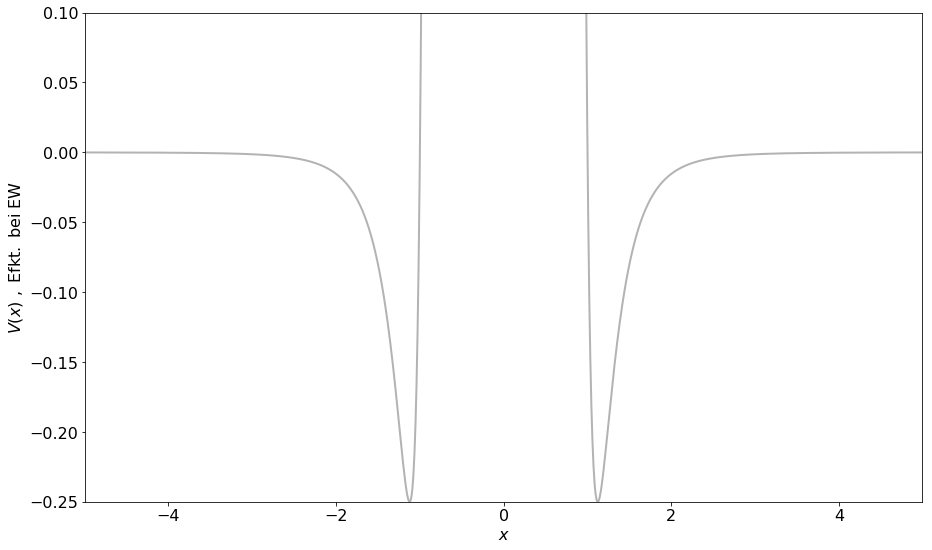

In [66]:
x_disk = diskretisierung(-L, L, N)    # Ortsdiskretisierung
V = doppelmulde(x_disk)              # Potential
V = h_Oszillator(x_disk)              # Potential
V = Lennard_Jones(x_disk, 1)              # Potential

# Eigenfunktionen berechnen
ew, ef = diagonalisierung(hquer, x_disk, V)

# Eigenfunktionen plotten
ax = plt.subplot(111)
plot_eigenfunktionen(ax, ew, ef, x_disk, V)
plt.show()

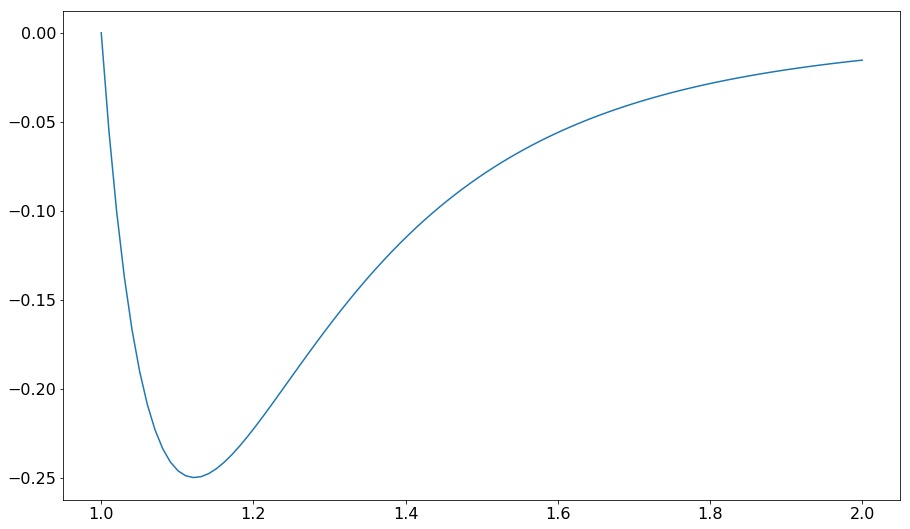

In [63]:
x =  np.linspace(1,2,100)
plt.plot(x, Lennard_Jones(x,1))
plt.show()

In [70]:
diskretisierung(0,1,9)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [72]:
np.linspace(0,1,9)